# Initial Spotify EDA

Here we will use the spotify api and analyze the top songs 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials  # used to login to spotify client
%matplotlib inline

In [26]:
# logining into the spotify api

cid = 'd328d69f743743ae9784dbc555e47a85'  # Client ID Login
secret = '9a363b6c67d2445fa072c7820fcc8c43'  # Client Secret #

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [27]:
artist_name = []
track_name = []
popularity = []
song_id = []
# genre =[]

for i in range (0,5000, 50):  # sets loops to loop through entires in limits of 50
#     print(i)
    results = sp.search(q='year:2019', type='track', limit=50, offset=i)  # specifies the query in a dictionary, type, limit, and offests of api
#     artists_info = results['tracks']['items'][0]['artists']
#     artists_id = str(artists_info).split("'id': '",1)[1].split("', 'name")[0]
#     genre.append(sp.artist(artist_id)['genres'])
    for index, track in enumerate(results['tracks']['items']):
        song_id.append(track['id'])
#         genre.append(sp.artist(artist_id)['genres'])
        artist_name.append(track['artists'][0]['name'])
        track_name.append(track['name'])

        popularity.append(track['popularity'])
#         genre.append(track['genres'])

tracks = pd.DataFrame({'song_id':song_id, 'artist_name':artist_name, 
                       'track_name':track_name,'popularity':popularity})

tracks.to_csv('tracklist.csv')
tracks.head()
#         print(index, track)
#     song_id.append(results['tracks']['items'][i]['id'])  # indexes returned dictionary to find the song id

,song_id,artist_name,track_name,popularity
0,0nbXyq5TXYPCO7pr3N8S4I,Roddy Ricch,The Box,100
1,696DnlkuDOXcMAnKlTgXXK,Arizona Zervas,ROXANNE,99
2,21jGcNKet2qwijlDFuPiPb,Post Malone,Circles,97
3,6Ozh9Ok6h4Oi1wUSLtBseN,DaBaby,BOP,93
4,6Gg1gjgKi2AK4e0qzsR7sd,Juice WRLD,Bandit (with YoungBoy Never Broke Again),92


In [28]:
tracks.shape

(5000, 4)

In [29]:
# spotifys api has a limit of 100 when trying to find audio features like dancibility and energy we will write a for loop
features = []
none_counter = 0
for i in range(0,len(song_id),100):    
    audio_features = sp.audio_features(song_id[i:i+100])
#     print(audio_features)
    for index, track in enumerate(audio_features):
        if track == None:
            none_counter = none_counter + 1
        else:
            features.append(track)  

features = pd.DataFrame.from_dict(features, orient='columns')
features.to_csv('song_features.csv')
print('Shape before removing text columns{}'.format(features.shape))
features.head()

Shape before removing text columns(5000, 18)


,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.1040,https://api.spotify.com/v1/audio-analysis/0nbX...,0.896,196653,0.586,0nbXyq5TXYPCO7pr3N8S4I,0.00000,10,0.7900,-6.687,0,0.0559,116.971,4,https://api.spotify.com/v1/tracks/0nbXyq5TXYPC...,audio_features,spotify:track:0nbXyq5TXYPCO7pr3N8S4I,0.642
1,0.0522,https://api.spotify.com/v1/audio-analysis/696D...,0.621,163636,0.601,696DnlkuDOXcMAnKlTgXXK,0.00000,6,0.4600,-5.616,0,0.1480,116.735,5,https://api.spotify.com/v1/tracks/696DnlkuDOXc...,audio_features,spotify:track:696DnlkuDOXcMAnKlTgXXK,0.457
2,0.1920,https://api.spotify.com/v1/audio-analysis/21jG...,0.695,215280,0.762,21jGcNKet2qwijlDFuPiPb,0.00244,0,0.0863,-3.497,1,0.0395,120.042,4,https://api.spotify.com/v1/tracks/21jGcNKet2qw...,audio_features,spotify:track:21jGcNKet2qwijlDFuPiPb,0.553
3,0.1890,https://api.spotify.com/v1/audio-analysis/6Ozh...,0.769,159715,0.787,6Ozh9Ok6h4Oi1wUSLtBseN,0.00000,11,0.1290,-3.909,1,0.3670,126.770,4,https://api.spotify.com/v1/tracks/6Ozh9Ok6h4Oi...,audio_features,spotify:track:6Ozh9Ok6h4Oi1wUSLtBseN,0.836
4,0.0687,https://api.spotify.com/v1/audio-analysis/6Gg1...,0.474,189323,0.631,6Gg1gjgKi2AK4e0qzsR7sd,0.00000,5,0.1320,-5.884,0,0.3430,180.051,4,https://api.spotify.com/v1/tracks/6Gg1gjgKi2AK...,audio_features,spotify:track:6Gg1gjgKi2AK4e0qzsR7sd,0.425


In [30]:
features = pd.DataFrame.from_dict(features, orient='columns')
print('Shape before removing text columns{}'.format(features.shape))
features.head()


Shape before removing text columns(5000, 18)


,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.1040,https://api.spotify.com/v1/audio-analysis/0nbX...,0.896,196653,0.586,0nbXyq5TXYPCO7pr3N8S4I,0.00000,10,0.7900,-6.687,0,0.0559,116.971,4,https://api.spotify.com/v1/tracks/0nbXyq5TXYPC...,audio_features,spotify:track:0nbXyq5TXYPCO7pr3N8S4I,0.642
1,0.0522,https://api.spotify.com/v1/audio-analysis/696D...,0.621,163636,0.601,696DnlkuDOXcMAnKlTgXXK,0.00000,6,0.4600,-5.616,0,0.1480,116.735,5,https://api.spotify.com/v1/tracks/696DnlkuDOXc...,audio_features,spotify:track:696DnlkuDOXcMAnKlTgXXK,0.457
2,0.1920,https://api.spotify.com/v1/audio-analysis/21jG...,0.695,215280,0.762,21jGcNKet2qwijlDFuPiPb,0.00244,0,0.0863,-3.497,1,0.0395,120.042,4,https://api.spotify.com/v1/tracks/21jGcNKet2qw...,audio_features,spotify:track:21jGcNKet2qwijlDFuPiPb,0.553
3,0.1890,https://api.spotify.com/v1/audio-analysis/6Ozh...,0.769,159715,0.787,6Ozh9Ok6h4Oi1wUSLtBseN,0.00000,11,0.1290,-3.909,1,0.3670,126.770,4,https://api.spotify.com/v1/tracks/6Ozh9Ok6h4Oi...,audio_features,spotify:track:6Ozh9Ok6h4Oi1wUSLtBseN,0.836
4,0.0687,https://api.spotify.com/v1/audio-analysis/6Gg1...,0.474,189323,0.631,6Gg1gjgKi2AK4e0qzsR7sd,0.00000,5,0.1320,-5.884,0,0.3430,180.051,4,https://api.spotify.com/v1/tracks/6Gg1gjgKi2AK...,audio_features,spotify:track:6Gg1gjgKi2AK4e0qzsR7sd,0.425


In [31]:
# cleaning up the data removing unnecessary cols and checking for nuls ets
features['song_id'] = features['id']
features = features.drop(['analysis_url','track_href','type', 'uri', 'id'], axis=1)
print('Shape after removing columns{}'.format(features.shape))
features.head()

Shape after removing columns(5000, 14)


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_id
0,0.1040,0.896,196653,0.586,0.00000,10,0.7900,-6.687,0,0.0559,116.971,4,0.642,0nbXyq5TXYPCO7pr3N8S4I
1,0.0522,0.621,163636,0.601,0.00000,6,0.4600,-5.616,0,0.1480,116.735,5,0.457,696DnlkuDOXcMAnKlTgXXK
2,0.1920,0.695,215280,0.762,0.00244,0,0.0863,-3.497,1,0.0395,120.042,4,0.553,21jGcNKet2qwijlDFuPiPb
3,0.1890,0.769,159715,0.787,0.00000,11,0.1290,-3.909,1,0.3670,126.770,4,0.836,6Ozh9Ok6h4Oi1wUSLtBseN
4,0.0687,0.474,189323,0.631,0.00000,5,0.1320,-5.884,0,0.3430,180.051,4,0.425,6Gg1gjgKi2AK4e0qzsR7sd


In [32]:
# merging both dataframes 
merged_tracks = tracks.merge(features, on='song_id', copy =False)
# merged_tracks.drop('id', axis=1, inplace=True)
print('Shape of Merged tracks', merged_tracks.shape)
merged_tracks.head()

Shape of Merged tracks (5000, 17)


,song_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0nbXyq5TXYPCO7pr3N8S4I,Roddy Ricch,The Box,100,0.1040,0.896,196653,0.586,0.00000,10,0.7900,-6.687,0,0.0559,116.971,4,0.642
1,696DnlkuDOXcMAnKlTgXXK,Arizona Zervas,ROXANNE,99,0.0522,0.621,163636,0.601,0.00000,6,0.4600,-5.616,0,0.1480,116.735,5,0.457
2,21jGcNKet2qwijlDFuPiPb,Post Malone,Circles,97,0.1920,0.695,215280,0.762,0.00244,0,0.0863,-3.497,1,0.0395,120.042,4,0.553
3,6Ozh9Ok6h4Oi1wUSLtBseN,DaBaby,BOP,93,0.1890,0.769,159715,0.787,0.00000,11,0.1290,-3.909,1,0.3670,126.770,4,0.836
4,6Gg1gjgKi2AK4e0qzsR7sd,Juice WRLD,Bandit (with YoungBoy Never Broke Again),92,0.0687,0.474,189323,0.631,0.00000,5,0.1320,-5.884,0,0.3430,180.051,4,0.425


In [33]:
# check for duplicates even though there shouldn't be 
merged_tracks.drop_duplicates(subset=['artist_name','track_name'], inplace=True)
print('Shape after dropping duplicates', merged_tracks.shape)

Shape after dropping duplicates (4796, 17)


In [34]:
# we can save this file now that we have it for use in other places
merged_tracks.to_csv('2019TopTracks.csv')

(14.0, 0.0)

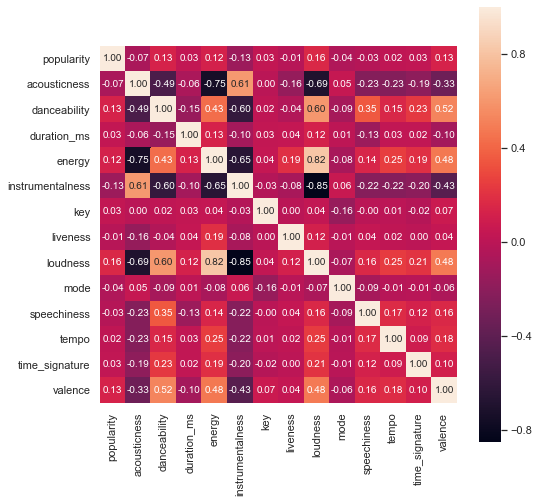

In [35]:
# lets look into the correlation map to see if we cna any correations to popularity
fig, ax = plt.subplots(figsize=(8,8))
corr = merged_tracks.corr()
sns.heatmap(corr, annot=True, fmt='.2f', annot_kws={'size': 10}, square=True)

# to fix the half box error from sns heatmap we have to adjust the ax limits using the code below
bottom, top = ax.get_ylim()  
ax.set_ylim(bottom + 0.5, top - 0.5)

From above we are able to see the most that dancibility energy loudness and valence seem to have to greatest correlation. We can plot this in a scatter plot. 

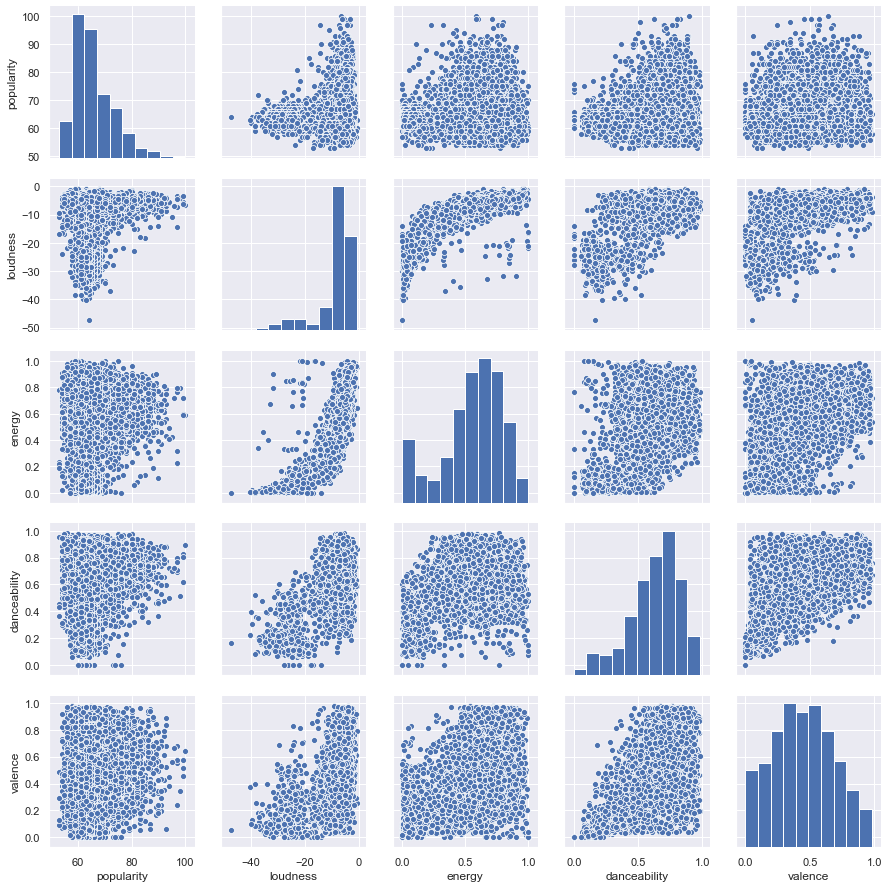

In [36]:
int_features = merged_tracks[['popularity','loudness','energy','danceability','valence']]
sns.pairplot(int_features)

Here we can see some interesting relationships. For example looking at loudness the songs that seem to be quiter are not as popular as those that are. We can also see that although alot of the songs are pretty danceable there are also alot of non popular songs.

After observing we can use these features to predict the popularity of a song using Machine Learning.

# Machine learning 

Using maching learning to predict popularity based on feautres such as dancibility etc. We will use three models to predict and compare the accuracy of our models. We will use, KNN
SVM
Decision Tree


#### K - Nearest Neighbors 

In [37]:
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=42)

In [38]:
features = int_features.drop('popularity', axis=1)
label = int_features['popularity']
X_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.33, random_state=42)


In [39]:
KnnR = KNeighborsRegressor(n_neighbors=10)
KnnR.fit(X_train, y_train)
pred = KnnR.predict(x_test)

In [40]:
pred

array([62.6, 63.5, 62.7, ..., 69.4, 67.6, 62.3])

In [41]:
KnnR.score(X_train, y_train)

0.1561297006654353

In [42]:
KnnR.score(x_test, y_test)

-0.017142885931620055

In [43]:
seed = 44  # random seed
## initializing regression models 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor

''''We are interested in the following 14 regression models.
All initialized with default parameters except random_state and n_jobs.'''
lr = LinearRegression(n_jobs = -1)
lasso = Lasso(random_state = seed)
ridge = Ridge(random_state = seed)
elnt = ElasticNet(random_state = seed)
kr = KernelRidge()
dt = DecisionTreeRegressor(random_state = seed)
svr = SVR()
knn = KNeighborsRegressor(n_jobs= -1)
pls = PLSRegression()
rf = RandomForestRegressor(n_jobs = -1, random_state = seed)
et = ExtraTreesRegressor(n_jobs = -1, random_state = seed)
ab = AdaBoostRegressor(random_state = seed)
gb = GradientBoostingRegressor(random_state = seed)

In [44]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)
# x_test = scaler.fit_transform(x_test)
# y_train = scaler.fit_transform(y_train.reshape(-1,1))
# y_test = scaler.fit_transform(y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(0.5, 1.0, 'Training Score (R^2) vs Model')

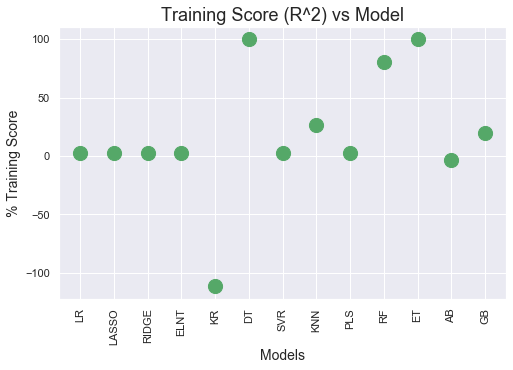

In [45]:
## function to return accuracy by default score method that reurns R^2
def r2_train(model):
    model.fit(X_train, y_train)
    return model.score(X_train, y_train)

## calculating R^2 score for all the models in a for loop
models = [lr, lasso, ridge, elnt, kr, dt, svr, knn, pls, rf, et, ab, gb]
training_score = []
for model in models:
    training_score.append(r2_train(model))

## plotting training accuracy for each model 
train_score = pd.DataFrame(data = training_score, columns = ['Training R^2'])
## naming the index column values according to model type
train_score.index = ['LR', 'LASSO',  'RIDGE', 'ELNT', 'KR', 'DT', 'SVR', 'KNN', 'PLS', 'RF', 'ET', 'AB', 'GB']

train_score = (train_score*100).round(4)
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(train_score.index, train_score['Training R^2'], s = 200, c='g')
plt.xticks(rotation = 90)
ax.set_xlabel('Models',  fontsize=14)
ax.set_ylabel('% Training Score',  fontsize=14)
ax.set_title('Training Score (R^2) vs Model',  fontsize=18)

In [46]:
pred = dt.predict(x_test)

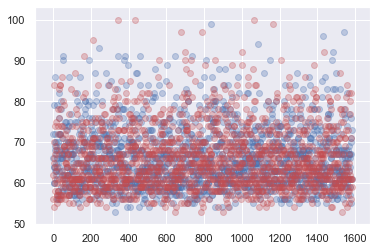

In [47]:
plt.scatter(np.arange(len(y_test)), y_test, alpha=0.3)
plt.scatter(np.arange(len(y_test)), pred, color='r', alpha=0.3)


In [48]:
x_test.head()

,loudness,energy,danceability,valence
581,-7.827,0.420,0.584,0.283
929,-5.516,0.695,0.800,0.341
1755,-12.667,0.439,0.930,0.785
734,-4.039,0.468,0.541,0.690
1952,-8.901,0.414,0.569,0.350
